In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
print(type(mnist.train.images))

<class 'numpy.ndarray'>


In [0]:
print(mnist.train.labels[1])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [0]:
print(mnist.test.labels[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [0]:
print(x)
print(W)
print(b)

Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>


**Створимо модель з єдиним шаром - це вихідний шар softmax**

In [0]:
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])) #reduction_indices = axis

In [0]:
print(y)
print(y_)
print(cross_entropy)

Tensor("Softmax:0", shape=(?, 10), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)
Tensor("Mean:0", shape=(), dtype=float32)


In [0]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy) # or Adam below

In [0]:
train_step = tf.train.AdamOptimizer().minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(init))
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100) 
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
  print(sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})) # just bath model or useless code?

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [0]:
print(init)
print(sess)
print(sess.run(init))
print(y_[1])
print(tf.argmax(y_, 1))

name: "init_6"
op: "NoOp"
input: "^Variable/Assign"
input: "^Variable_1/Assign"

None
Tensor("strided_slice_2:0", shape=(10,), dtype=float32)
Tensor("ArgMax_12:0", shape=(?,), dtype=int64)


In [0]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Точність: %s" %sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Точність: 0.9163


In [0]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

SyntaxError: ignored

**Додамо в модель скритий шар ReLU**

In [0]:
W_relu = tf.Variable(tf.truncated_normal([784, 50], stddev=0.1))
b_relu = tf.Variable(tf.truncated_normal([50], stddev=0.1))
h = tf.nn.relu(tf.matmul(x, W_relu) + b_relu)

In [0]:
keep_probability = tf.placeholder(tf.float32)
h_drop = tf.nn.dropout(h, keep_probability)

In [0]:
W = tf.Variable(tf.zeros([50, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(h_drop, W) + b)

In [0]:
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100) 
  
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_probability: 0.8})
print("Точність: %s" % sess.run(accuracy, feed_dict={
x: mnist.test.images, y_: mnist.test.labels, keep_probability: 1.} ))

Точність: 0.9201


In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Модифікована модель з одним скритим шаром ReLU

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import tensorflow as tf
import matplotlib.pyplot as plt

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])) #reduction_indices = axis

#train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer().minimize(cross_entropy)

W_relu = tf.Variable(tf.truncated_normal([784, 50], stddev=0.1))
b_relu = tf.Variable(tf.truncated_normal([50], stddev=0.1))
h = tf.nn.relu(tf.matmul(x, W_relu) + b_relu)

keep_probability = tf.placeholder(tf.float32)
h_drop = tf.nn.dropout(h, keep_probability)

is_train = tf.placeholder(tf.bool, name="is_train")
h_bath = tf.layers.batch_normalization(h_drop, training=is_train)

W_relu2 = tf.Variable(tf.truncated_normal([50, 30], stddev=0.1))
b_relu2 = tf.Variable(tf.truncated_normal([30], stddev=0.1))
h2 = tf.nn.relu(tf.matmul(h_bath, W_relu2) + b_relu2)

keep_probability2 = tf.placeholder(tf.float32)
h_drop2 = tf.nn.dropout(h2, keep_probability2)

is_train2 = tf.placeholder(tf.bool, name="is_train")
h_bath2 = tf.layers.batch_normalization(h_drop2, training=is_train2)


W = tf.Variable(tf.zeros([30, 10]))
b = tf.Variable(tf.zeros([10]))
logit = tf.matmul(h_bath2, W) + b

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logit))

Step # 500
Train loss =  0.016288318
Train accuracy =  0.9228
Test accuracy =  0.904
Step # 1000
Train loss =  0.012873517
Train accuracy =  0.904
Test accuracy =  0.9142
Step # 1500
Train loss =  0.018626718
Train accuracy =  0.9142
Test accuracy =  0.918
Step # 2000
Train loss =  0.013045275
Train accuracy =  0.918
Test accuracy =  0.9192
Step # 2500
Train loss =  0.01763624
Train accuracy =  0.9192
Test accuracy =  0.922
Step # 3000
Train loss =  0.019374771
Train accuracy =  0.922
Test accuracy =  0.9226
Step # 3500
Train loss =  0.0073426203
Train accuracy =  0.9226
Test accuracy =  0.9234
Step # 4000
Train loss =  0.010754568
Train accuracy =  0.9234
Test accuracy =  0.9261
Step # 4500
Train loss =  0.0075589544
Train accuracy =  0.9261
Test accuracy =  0.925
Step # 5000
Train loss =  0.008636658
Train accuracy =  0.925
Test accuracy =  0.9262
Step # 5500
Train loss =  0.010318329
Train accuracy =  0.9262
Test accuracy =  0.9266
Step # 6000
Train loss =  0.009731149
Train accurac

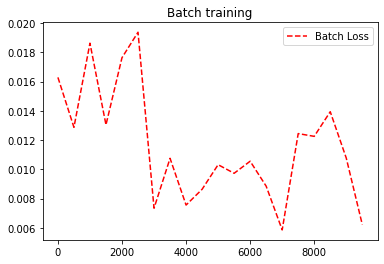

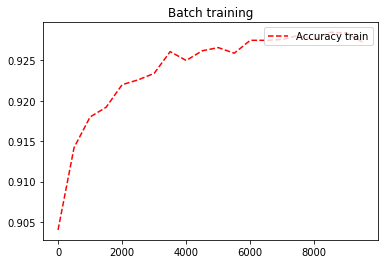

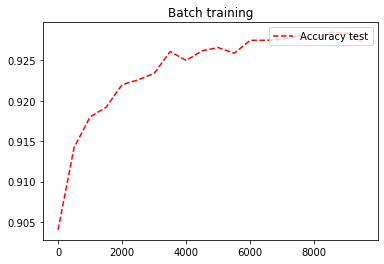

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

loss = tf.reduce_mean(tf.square(y - y_))
loss_batch = []
accuracy_bath = []
accuracy_bath_train = []

for i in range(10000):
   batch_xs, batch_ys = mnist.train.next_batch(100) 
   sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_probability: 0.8, is_train: True, keep_probability2: 0.8, is_train2: True})
   if(i+1) % 500 == 0:
        print('Step #', str(i+1))
        temp_loss = sess.run(loss, feed_dict={x: batch_xs, y_: batch_ys, keep_probability: 0.8, keep_probability2: 0.8})
        loss_batch.append(temp_loss)
        print('Train loss = ', temp_loss)
        temp_accuracy_train = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_probability: 1., keep_probability2: 1.})
        print("Train accuracy = ", temp_accuracy)
        accuracy_bath_train.append(temp_accuracy_train)
        temp_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_probability: 1., keep_probability2: 1})
        print("Test accuracy = ", temp_accuracy)
        accuracy_bath.append(temp_accuracy)


print("Кінцева точність: %s" % sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_probability: 1., keep_probability2: 1.}))

plt.plot(range(0, 10000, 500), loss_batch, 'r--', label='Batch Loss')
plt.legend(loc='upper right')
plt.title('Batch training')
plt.show()
plt.close()
plt.plot(range(0, 10000, 500), accuracy_bath_train, 'r--', label='Accuracy train')
plt.legend(loc='upper right')
plt.title('Batch training')
plt.show()
plt.close()
plt.plot(range(0, 10000, 500), accuracy_bath, 'r--', label='Accuracy test')
plt.legend(loc='upper right')
plt.title('Batch training')
plt.show()